# Regresion lineal y ajuste de curvas (Polinomios y mas funciones)

## 1.  Minimos Cuadrados
## 2. Polinomios
## 3. Funciones

#1. Least Squares

El objetivo es encontrar las funciones que mas se ajusten a mis datos, para eso hay que minimizar una funcion que esta definida por

$f_{ls}(X_m, X_p) = \sum (X_{m}[i] - X_{p}[i])^2$ 

La cual me dice que tanto se parecen mis datos (medidos) a mis predicciones (predicted). Mis datos serán identicos a mis
predicciones cuando $X_{measured}[i] = X_{predicted}[i]$ por lo tanto $f_{ls}=0$. En la realidad mis predicciones serán parecidas a mis datos, esto quiere decir que $f_{ls} \sim 0$ por lo tanto esta función se puede derivar para encontrar el minimo, tambien podria utilizarse alguno de los métodos para encontrar raices como Newton-Rhapson. 

En python existe la funcion Polyfit la cual minimiza $f_{ls}$

#2. Polyfit

In [1]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (8,5)

Populating the interactive namespace from numpy and matplotlib


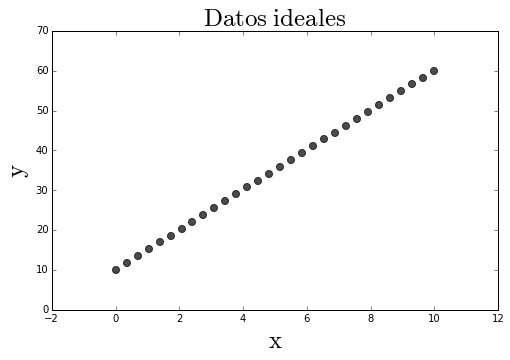

In [2]:
#Generating random data.

x = linspace(0, 10, 30)
y = 5*x+10

scatter(x, y, c='k', alpha=0.7, s=50)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
title("$\mathrm{Datos\ ideales}$", fontsize=25)

### En la vida real dificilmente vamos a medir algo con tal exactitud, así que simulemos algo de ruido.

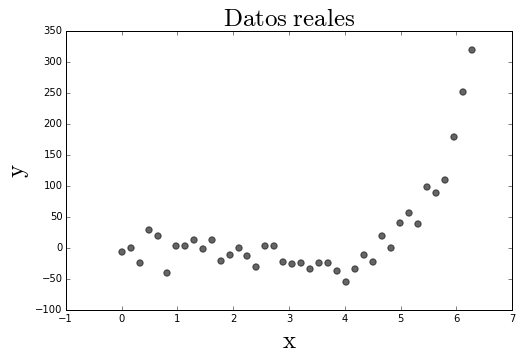

In [25]:
dy = randn(y.size)*5 # random.normal con sigma=1 centrada en cero, y.size==len(y)
y1 = y+dy
scatter(x, y1, c='k', s=40, alpha=0.6)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
title("$\mathrm{Datos\ reales}$", fontsize=25)

In [26]:
help(polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

('Coeficientes de la regresion lineal=', array([ 23.08433982, -52.16197463]))


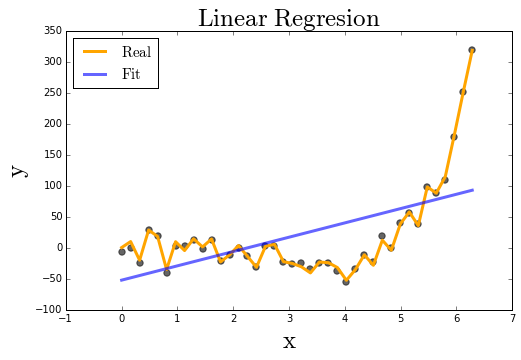

In [28]:
fit =  polyfit(x, y1, 1)

print("Coeficientes de la regresion lineal=", fit)

plot(x, y, linewidth=3.0, c='orange', label="$\mathrm{Real}$")
plot(x, x*fit[0] + fit[1], linewidth='3.0', label="$\mathrm{Fit}$", c="blue", alpha=0.6)
scatter(x, y1, c='k', alpha=0.6, s=40)
legend(loc='best', fontsize=15)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
title("$\mathrm{Linear\ Regresion}$", fontsize=25)

## Tambien scipy tiene su propia libreria

In [147]:
help(stats.linregress)

Help on function linregress in module scipy.stats.stats:

linregress(x, y=None)
    Calculate a regression line
    
    This computes a least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        two sets of measurements.  Both arrays should have the same length.
        If only x is given (and y=None), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.
    
    Returns
    -------
    slope : float
        slope of the regression line
    intercept : float
        intercept of the regression line
    r-value : float
        correlation coefficient
    p-value : float
        two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero.
    stderr : float
        Standard error of the estimate
    
    
    Examples
    --------
    >>> from scipy import st

(23.084339816288782, -52.161974633218605, 0.56355462703255521, 0.00015281284099742114, 5.4892260659424386)


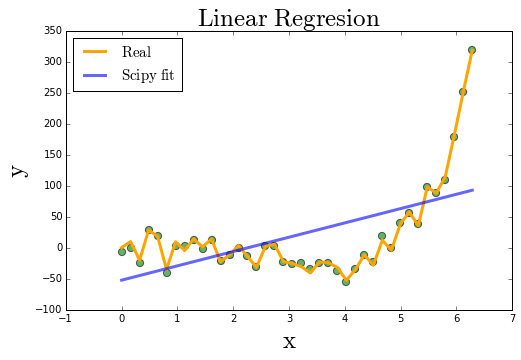

In [29]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y1)
print(slope, intercept, r_value, p_value, std_err)

plot(x, y, linewidth=3.0, c='orange', label="$\mathrm{Real}$")
plot(x, x*slope + intercept, linewidth='3.0', label="$\mathrm{Scipy\ fit}$", c="blue", alpha=0.6)
scatter(x, y1, c='green', alpha=0.6, s=52)
legend(loc='best', fontsize=15)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
title("$\mathrm{Linear\ Regresion}$", fontsize=25)

# 3. Coeficiente de correlación

¿Que tan bien se aproxima mi modelo teórico a las mediciones?, Esto esta determinado por el coeficiente de terminación $R^2$

$R^2 = 1 - \dfrac{EstimatedError}{Variance}$

Si $R^2=1$ el modelo explica toda la variabilidad en mis datos, $si R^2=0$ no hay ninguna relación entre mi modelo y los datos.

In [6]:
def R2(xexp, xteo):
    EE = sum((xteo-xexp)**2)
    mean = sum(xexp)/(len(xexp))
    variance = sum((mean-xexp)**2)
    R2 = 1 - EE/variance
    return R2

In [10]:
yteo  = x*slope + intercept
R2(y, yteo)

0.99187069809537021

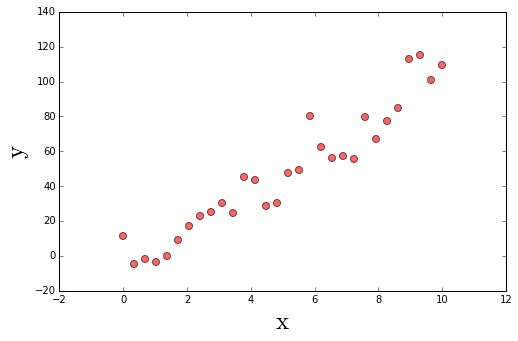

In [11]:
y = x**2 + x + 10
dy = randn(y.size)*10
y = y + dy

scatter(x, y, c='r', alpha=0.6, s=50)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)

## Ahora usemos polyfit

0.92077095544307597

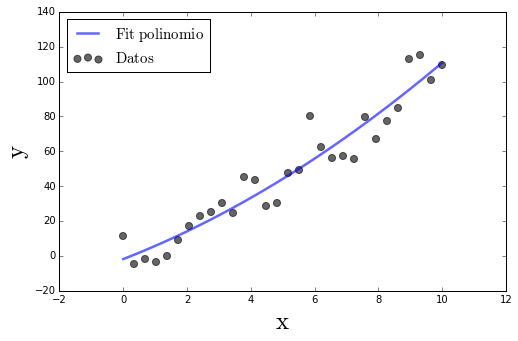

In [14]:
fit = polyfit(x, y, 2)

plot(x, fit[0]*x**2 + fit[1]*x + fit[2], linewidth=2.5, alpha=0.6, label="$\mathrm{Fit\ polinomio}$")
scatter(x, y, c='k', alpha=0.6, label="$\mathrm{Datos}$", s=50)
legend(loc="upper left", fontsize=15)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
yteo = fit[0]*x**2 + fit[1]*x + fit[2]
R2(y, yteo)

#4. Fitting curves

In [15]:
from scipy.optimize import curve_fit

In [16]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, **kw)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise a ValueError
        is rais

## 4.1 Función trigonometrica

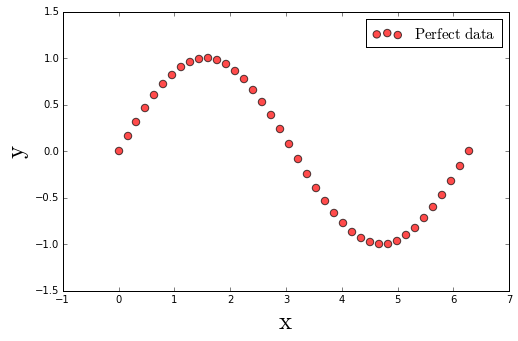

In [17]:
x = linspace(0, 2*pi, 40)
y = sin(x)
scatter(x, y, s=55, alpha=0.7, label="$\mathrm{Perfect\ data}$", c="red")
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
legend(fontsize=15)

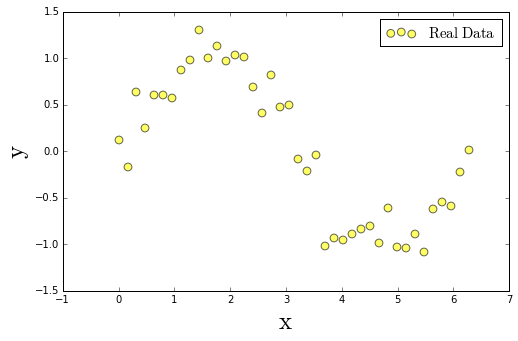

In [18]:
x = linspace(0, 2*pi, 40)
y = sin(x)
dy = randn(y.size)*0.2
y = y + dy
scatter(x, y, s=60, alpha=0.6, label="$\mathrm{Real\ Data}$", c="yellow")
legend(fontsize=15)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)

## Hay que definir la función que mi intución cree que es al correcta! 

(array([-66.00274419,   1.35568448]), array([[  2.07340771e+02,   3.35164608e-02],
       [  3.35164608e-02,   4.98082846e-02]]))


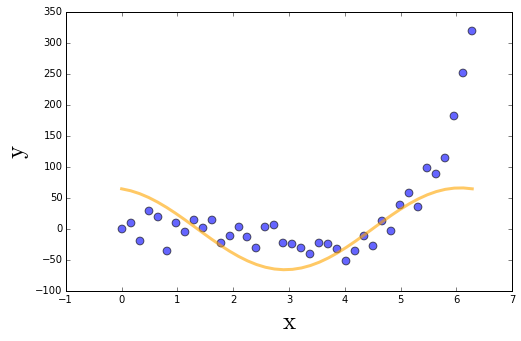

In [30]:
def sinfunc(x,a,b):
    return a*np.sin(x-b)
fitpars, covmat = curve_fit(sinfunc,x,y)

plot(x, sinfunc(x, fitpars[0], fitpars[1]), 'r-', alpha=0.6, lw=3, c="orange", label="$\mathrm{Sinfunc\ fit}$")
scatter(x, y, alpha=0.6, s=60)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
print(fitpars, covmat)

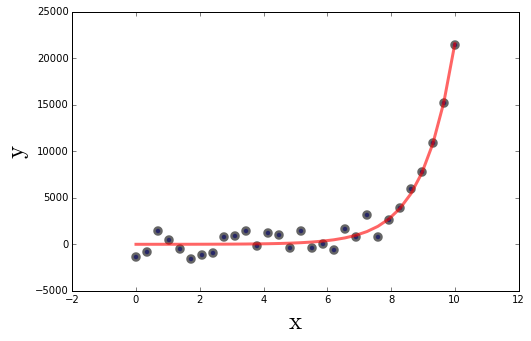

In [20]:
x = linspace(0, 10, 30)
y = e**x
dy = randn(y.size)*1e3
y += dy
def expfunc(x,a,b):
    return a*e**(x-b)
fitpars, covmat = curve_fit(expfunc,x,y)

plot(x, expfunc(x, fitpars[0], fitpars[1]), 'r-', alpha=0.6, lw=3)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)
scatter(x, y, alpha=0.6, lw=5)

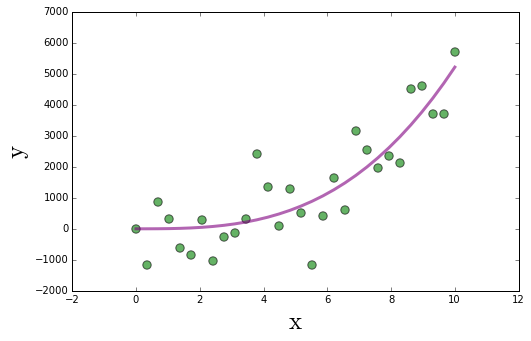

In [21]:
x = linspace(0, 10, 30)
y = 5*x**3
dy = randn(y.size)*1e3
y += dy
def plfunc(x,a,b):
    return a*x**b
fitpars, covmat = curve_fit(plfunc,x,y)

plot(x, plfunc(x, fitpars[0], fitpars[1]), c="purple", lw=3, alpha=0.6)
scatter(x, y, alpha=0.6, c="green", s=70)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)

##Intentemos una función un poco mas complicada!

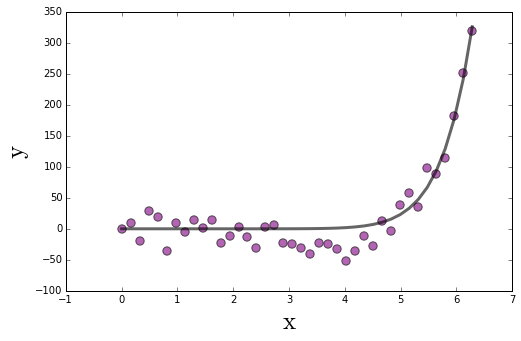

In [22]:
x = linspace(0, 2*pi, 40)
y = sinh(x)*cos(x)
dy = randn(y.size)*20
y += dy

fitpars, covmat = curve_fit(plfunc,x,y)
plot(x, plfunc(x, fitpars[0], fitpars[1]), c='black', lw=3, alpha=0.6)
scatter(x, y, alpha=0.6, c="purple", s=70)
xlabel("$\mathrm{x}$", fontsize=25)
ylabel("$\mathrm{y}$", fontsize=25)

#5. Exercise:

## 1. Encuentre la ley de expansion del Universo.

En el archivo Hubble.txt se encuentran mediciones por, La primera columna corresponde
al ID de la galaxia, la segunda la distancia de la galaxia y la tercera la velocidad a la cual se aleja. 

1. Grafique la distancia de las galaxias en funcion de su velocidad.

¿Que relacion ve entre estas dos variables?

2. Encuentre un ajuste a estos datos y encuentre una relación que modele la expansion del Universo.

## 2. Hacer ajustes de los archivos:

data1.dat, data2.dat, data3.dat, data4.dat





#6. References

### 1. Ejemplos: http://nbviewer.ipython.org/gist/keflavich/4042018

###2. Regresion lineal multivariada: http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares